In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats.mstats import winsorize
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [3]:
countries = {
    'Canada': {
        'property': "Real Residential Property Prices for Canada.csv",
        'unemployment': "Unemployment Rate Total in Canada.csv",
        'inflation': "Inflation, consumer prices for Canada.csv",
        'consumption': "Real Final Consumption Expenditure for Canada.csv",
        'file_type': 'csv',
        'start_date': '1970-01-01',
        'end_date': '2023-12-31'
    },
    'UK': {
        'property': "Real Residential Property Prices UK.csv",
        'unemployment': "Unemployment Rate Total in UK.csv",
        'inflation': "Inflation, consumer prices for UK.csv",
        'consumption': "Real Final Consumption Expenditure for United Kingdom.csv",
        'file_type': 'csv',
        'start_date': '1995-01-01',
        'end_date': '2023-12-31'
    },
    'USA': {
        'property': "Real Residential Property Prices for US.xlsx",
        'unemployment': "Unemployment Rate Total in US.csv",
        'inflation': "Inflation, consumer prices for United States.csv",
        'consumption': "Real Final Consumption Expenditure for US.csv",
        'file_type': 'excel',
        'start_date': '1971-01-01',
        'end_date': '2023-12-31'
    }
}

merged_datasets = {}

for country, info in countries.items():
    
    if info['file_type'] == 'csv':
        df_property = pd.read_csv(info['property'])
    else:
        df_property = pd.read_excel(info['property'], sheet_name="Quarterly")
    
    df_unemployment = pd.read_csv(info['unemployment'])
    df_inflation = pd.read_csv(info['inflation'])
    df_consumption = pd.read_csv(info['consumption'])


    datasets = [df_property, df_unemployment, df_inflation, df_consumption]
    for df in datasets:
        df.columns = df.columns.str.lower()
        if 'observation_date' in df.columns:
            df['observation_date'] = pd.to_datetime(df['observation_date'])
        elif 'date' in df.columns:
            df.rename(columns={'date': 'observation_date'}, inplace=True)
            df['observation_date'] = pd.to_datetime(df['observation_date'])


    df_property = df_property.set_index('observation_date').resample('Y').mean().reset_index()
    df_unemployment = df_unemployment.set_index('observation_date').resample('Y').mean().reset_index()
    df_inflation = df_inflation.set_index('observation_date').resample('Y').mean().reset_index()
    df_consumption = df_consumption.set_index('observation_date').resample('Y').mean().reset_index()


    start_date = info['start_date']
    end_date = info['end_date']
    
    df_property = df_property[(df_property['observation_date'] >= start_date) & (df_property['observation_date'] <= end_date)]
    df_unemployment = df_unemployment[(df_unemployment['observation_date'] >= start_date) & (df_unemployment['observation_date'] <= end_date)]
    df_inflation = df_inflation[(df_inflation['observation_date'] >= start_date) & (df_inflation['observation_date'] <= end_date)]
    df_consumption = df_consumption[(df_consumption['observation_date'] >= start_date) & (df_consumption['observation_date'] <= end_date)]

    merged = df_property.merge(df_unemployment, on='observation_date', how='inner', suffixes=('_property', '_unemployment'))
    merged = merged.merge(df_inflation, on='observation_date')
    merged = merged.merge(df_consumption, on='observation_date', suffixes=('_inflation', '_consumption'))


    merged.columns = ['Year', 'Property_Prices', 'Unemployment_Rate', 'Inflation', 'Consumption_Expenditure']
    

    merged_datasets[country] = merged


def missing_value_analysis(df, country_name):
    missing_counts = df.isnull().sum()
    missing_percent = (missing_counts / len(df)) * 100
    missing_df = pd.DataFrame({
        'Missing Count': missing_counts,
        'Missing Percentage (%)': missing_percent
    })
    print(f"\nMissing Value Analysis: {country_name}")
    print(missing_df)


for country, df in merged_datasets.items():
    missing_value_analysis(df, country)


C:\Users\ihsan\AppData\Local\Temp\ipykernel_70280\2587947643.py:55: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_property = df_property.set_index('observation_date').resample('Y').mean().reset_index()
C:\Users\ihsan\AppData\Local\Temp\ipykernel_70280\2587947643.py:56: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_unemployment = df_unemployment.set_index('observation_date').resample('Y').mean().reset_index()
C:\Users\ihsan\AppData\Local\Temp\ipykernel_70280\2587947643.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_inflation = df_inflation.set_index('observation_date').resample('Y').mean().reset_index()
C:\Users\ihsan\AppData\Local\Temp\ipykernel_70280\2587947643.py:58: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_consumption = df_consumption.set_index


Missing Value Analysis: Canada
                         Missing Count  Missing Percentage (%)
Year                                 0                     0.0
Property_Prices                      0                     0.0
Unemployment_Rate                    0                     0.0
Inflation                            0                     0.0
Consumption_Expenditure              0                     0.0

Missing Value Analysis: UK
                         Missing Count  Missing Percentage (%)
Year                                 0                     0.0
Property_Prices                      0                     0.0
Unemployment_Rate                    0                     0.0
Inflation                            0                     0.0
Consumption_Expenditure              0                     0.0

Missing Value Analysis: USA
                         Missing Count  Missing Percentage (%)
Year                                 0                     0.0
Property_Prices              

C:\Users\ihsan\AppData\Local\Temp\ipykernel_70280\2587947643.py:55: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_property = df_property.set_index('observation_date').resample('Y').mean().reset_index()
C:\Users\ihsan\AppData\Local\Temp\ipykernel_70280\2587947643.py:56: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_unemployment = df_unemployment.set_index('observation_date').resample('Y').mean().reset_index()
C:\Users\ihsan\AppData\Local\Temp\ipykernel_70280\2587947643.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_inflation = df_inflation.set_index('observation_date').resample('Y').mean().reset_index()
C:\Users\ihsan\AppData\Local\Temp\ipykernel_70280\2587947643.py:58: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_consumption = df_consumption.set_index

In [4]:

numeric_columns = ['Property_Prices', 'Unemployment_Rate', 'Inflation', 'Consumption_Expenditure']


def outlier_analysis(df, country_name):
    outlier_summary = []

    for col in numeric_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

        outlier_summary.append({
            'Feature': col,
            'Outlier Count': outliers.shape[0],
            'Outlier Percentage (%)': round(100 * outliers.shape[0] / df.shape[0], 2)
        })

    outlier_df = pd.DataFrame(outlier_summary)

    print(f"\nOutlier Analysis (IQR Method): {country_name}")
    print(outlier_df)


for country, df in merged_datasets.items():
    outlier_analysis(df, country)



Outlier Analysis (IQR Method): Canada
                   Feature  Outlier Count  Outlier Percentage (%)
0          Property_Prices              2                    3.70
1        Unemployment_Rate              1                    1.85
2                Inflation              5                    9.26
3  Consumption_Expenditure              0                    0.00

Outlier Analysis (IQR Method): UK
                   Feature  Outlier Count  Outlier Percentage (%)
0          Property_Prices              1                    3.45
1        Unemployment_Rate              0                    0.00
2                Inflation              2                    6.90
3  Consumption_Expenditure              0                    0.00

Outlier Analysis (IQR Method): USA
                   Feature  Outlier Count  Outlier Percentage (%)
0          Property_Prices              1                    1.89
1        Unemployment_Rate              0                    0.00
2                Inflation      

In [5]:
def winsorize_inflation(df, country_name):
    
    inflation_original = df['Inflation'].copy()


    df['Inflation'] = winsorize(df['Inflation'], limits=[0.05, 0.05])


    inflation_comparison = pd.DataFrame({
        'Original': inflation_original.describe(),
        'Winsorized': df['Inflation'].describe()
    })

    print(f"\nInflation Winsorization Comparison: {country_name}")
    print(inflation_comparison)

for country, df in merged_datasets.items():
    winsorize_inflation(df, country)



Inflation Winsorization Comparison: Canada
        Original  Winsorized
count  54.000000   54.000000
mean    3.967563    3.949751
std     3.129114    3.018593
min     0.165563    0.717000
25%     1.796968    1.796968
50%     2.712179    2.712179
75%     4.986927    4.986927
max    12.471612   10.768972

Inflation Winsorization Comparison: UK
        Original  Winsorized
count  29.000000   29.000000
mean    2.399823    2.382353
std     1.571226    1.411567
min     0.368047    0.989487
25%     1.520402    1.520402
50%     2.201143    2.201143
75%     2.557756    2.557756
max     7.922049    6.793967

Inflation Winsorization Comparison: USA
        Original  Winsorized
count  53.000000   53.000000
mean    4.002071    4.002260
std     2.883782    2.665443
min    -0.355546    1.233584
25%     2.188027    2.188027
50%     3.212435    3.212435
75%     4.697859    4.697859
max    13.549202   11.054805


c:\Users\ihsan\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:4842: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\ihsan\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:4842: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\ihsan\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:4842: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(



Correlation Matrix: Canada
                         Inflation  Unemployment_Rate  Property_Prices  \
Inflation                 1.000000          -0.050778        -0.371623   
Unemployment_Rate        -0.050778           1.000000        -0.372524   
Property_Prices          -0.371623          -0.372524         1.000000   
Consumption_Expenditure  -0.563956          -0.307449         0.935320   

                         Consumption_Expenditure  
Inflation                              -0.563956  
Unemployment_Rate                      -0.307449  
Property_Prices                         0.935320  
Consumption_Expenditure                 1.000000  


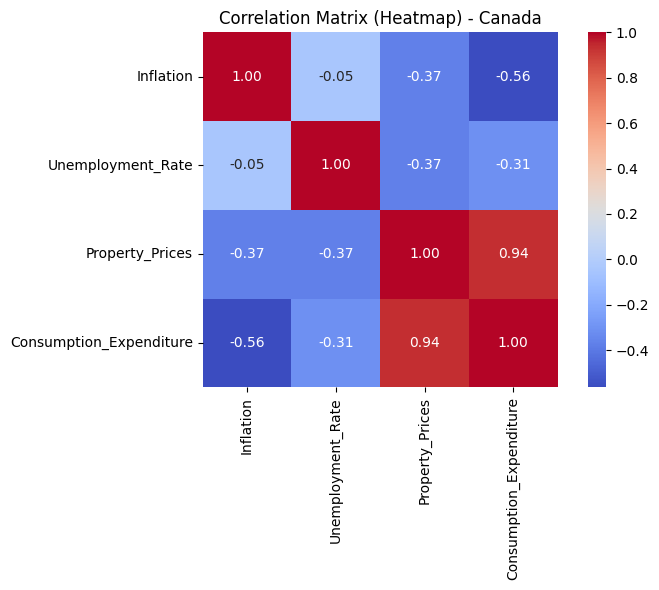


Correlation Matrix: UK
                         Inflation  Unemployment_Rate  Property_Prices  \
Inflation                 1.000000          -0.075372        -0.540971   
Unemployment_Rate        -0.075372           1.000000        -0.278485   
Property_Prices          -0.540971          -0.278485         1.000000   
Consumption_Expenditure   0.330470          -0.570264        -0.348884   

                         Consumption_Expenditure  
Inflation                               0.330470  
Unemployment_Rate                      -0.570264  
Property_Prices                        -0.348884  
Consumption_Expenditure                 1.000000  


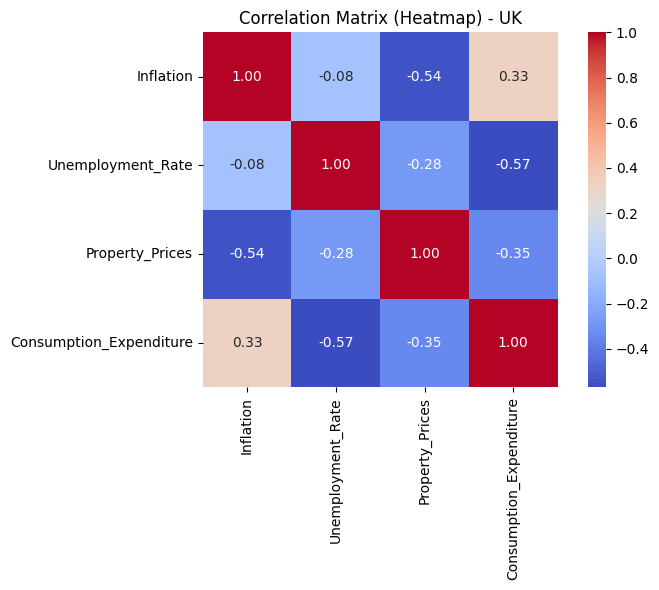


Correlation Matrix: USA
                         Inflation  Unemployment_Rate  Property_Prices  \
Inflation                 1.000000           0.089437        -0.101551   
Unemployment_Rate         0.089437           1.000000        -0.337610   
Property_Prices          -0.101551          -0.337610         1.000000   
Consumption_Expenditure  -0.528294          -0.343233         0.081725   

                         Consumption_Expenditure  
Inflation                              -0.528294  
Unemployment_Rate                      -0.343233  
Property_Prices                         0.081725  
Consumption_Expenditure                 1.000000  


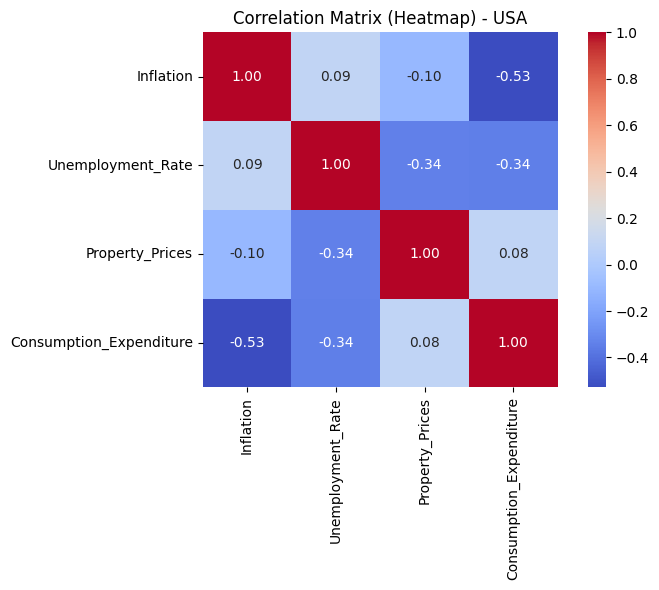

In [6]:
numeric_columns = ['Inflation', 'Unemployment_Rate', 'Property_Prices', 'Consumption_Expenditure']


def correlation_analysis(df, country_name):

    correlation_matrix = df[numeric_columns].corr()


    print(f"\nCorrelation Matrix: {country_name}")
    print(correlation_matrix)

    # Plot heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
    plt.title(f"Correlation Matrix (Heatmap) - {country_name}")
    plt.tight_layout()
    plt.show()


for country, df in merged_datasets.items():
    correlation_analysis(df, country)


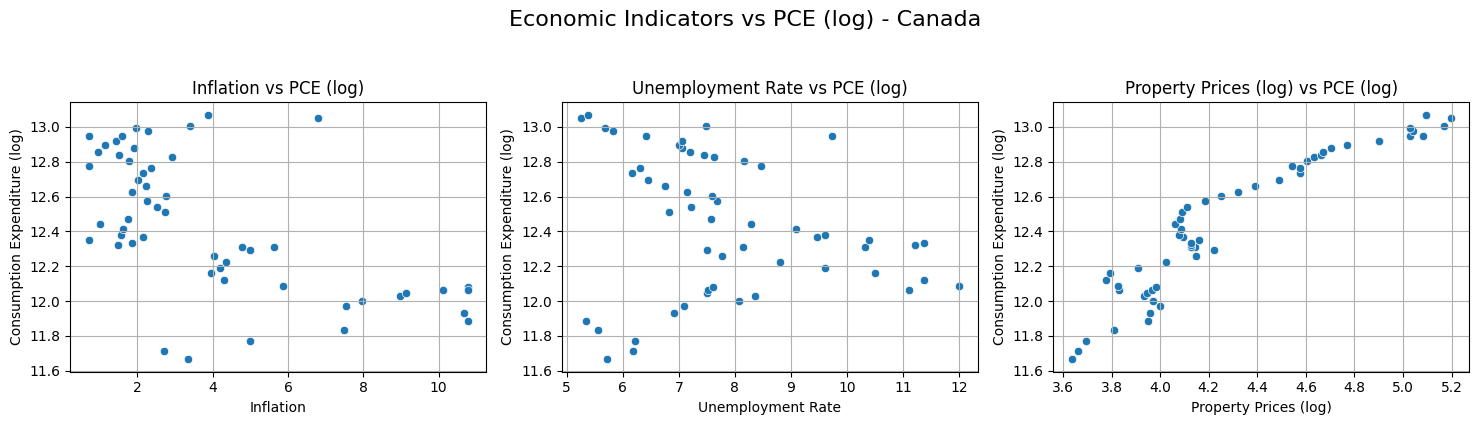

c:\Users\ihsan\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


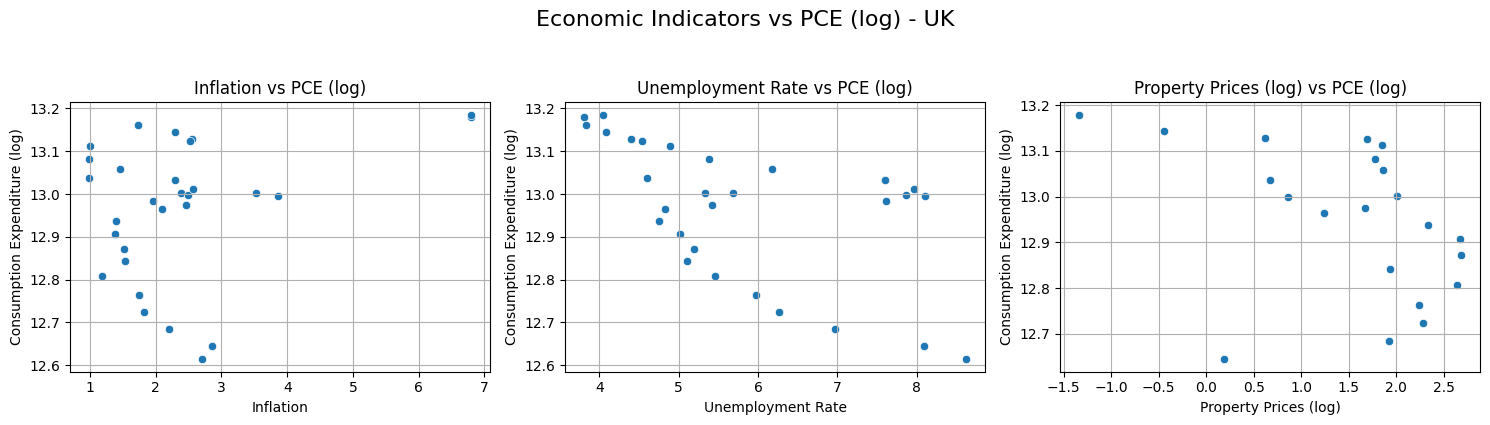

c:\Users\ihsan\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


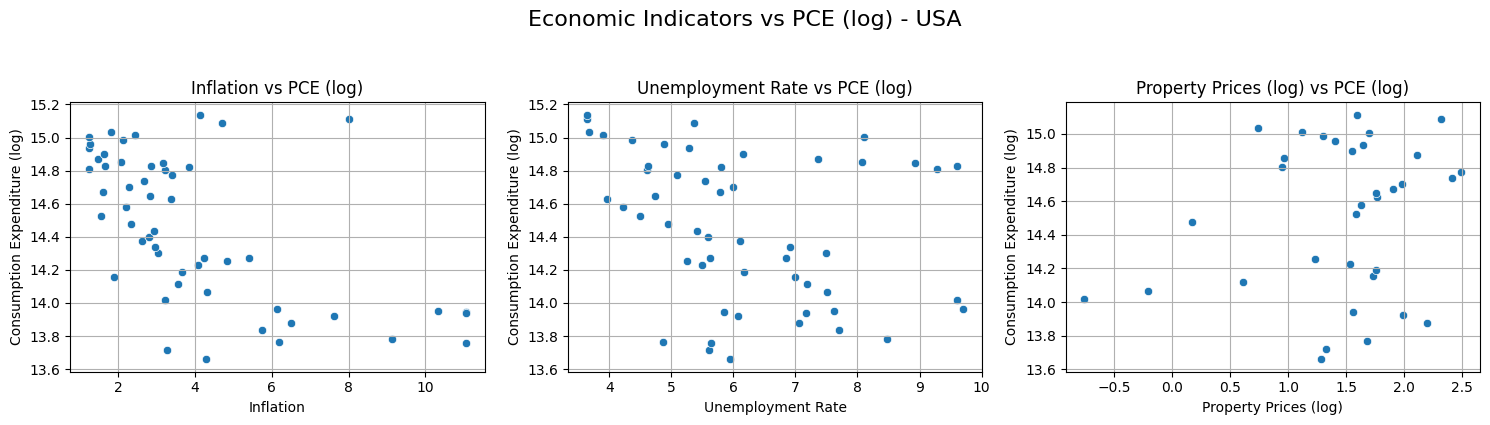

In [7]:
def scatter_plots_with_log(df, country_name):
    # Apply log transformations
    df['Log_Property_Prices'] = np.log(df['Property_Prices'])
    df['Log_PCE'] = np.log(df['Consumption_Expenditure'])

 
    plot_vars = ['Inflation', 'Unemployment_Rate', 'Log_Property_Prices']
    titles = ['Inflation', 'Unemployment Rate', 'Property Prices (log)']

    plt.figure(figsize=(15, 4))
    for i, x in enumerate(plot_vars):
        plt.subplot(1, 3, i + 1)
        sns.scatterplot(data=df, x=x, y='Log_PCE')
        plt.title(f'{titles[i]} vs PCE (log)')
        plt.xlabel(titles[i])
        plt.ylabel('Consumption Expenditure (log)')
        plt.grid(True)

    plt.suptitle(f'Economic Indicators vs PCE (log) - {country_name}', fontsize=16, y=1.05)
    plt.tight_layout()
    plt.show()


for country, df in merged_datasets.items():
   scatter_plots_with_log(df, country)


In [8]:
def regression_summary_pce(df, country_name):
    # Sadece pozitif ve geçerli verileri seç
    df = df[
        (df['Consumption_Expenditure'] > 0) &
        (df['Property_Prices'] > 0) &
        df[['Inflation', 'Unemployment_Rate']].notnull().all(axis=1)
    ].copy()

    # Log dönüşümleri
    df['Log_PCE'] = np.log(df['Consumption_Expenditure'])
    df['Log_Property_Prices'] = np.log(df['Property_Prices'])

    # Gerekli sütunları kontrol et
    X = df[['Inflation', 'Unemployment_Rate', 'Log_Property_Prices']].copy()
    y = df['Log_PCE'].copy()

    # NaN ya da inf olup olmadığını kontrol et
    if not np.all(np.isfinite(X)) or not np.all(np.isfinite(y)):
        print(f"Skipping {country_name} due to invalid data.")
        return None

    # Constant ekle
    X = sm.add_constant(X)

    # Modeli kur ve eğit
    model = sm.OLS(y, X).fit()

    # Özet sonuçları yazdır
    print(f"\n--- Multiple Regression Summary for {country_name} ---")
    print(model.summary())

    # Basit tablo döndür
    coef_df = pd.DataFrame({
        'Variable': model.params.index,
        'Coefficient': model.params.values,
        'p-value': model.pvalues.values,
        'R-squared': [model.rsquared] * len(model.params)
    })

    return coef_df.round(4)

# Her ülke için modeli çalıştır
summary_by_country = {}
for country, df in merged_datasets.items():
    result = regression_summary_pce(df, country)
    if result is not None:
        summary_by_country[country] = result



--- Multiple Regression Summary for Canada ---
                            OLS Regression Results                            
Dep. Variable:                Log_PCE   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     215.9
Date:                Fri, 30 May 2025   Prob (F-statistic):           1.34e-28
Time:                        17:01:44   Log-Likelihood:                 45.539
No. Observations:                  54   AIC:                            -83.08
Df Residuals:                      50   BIC:                            -75.12
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

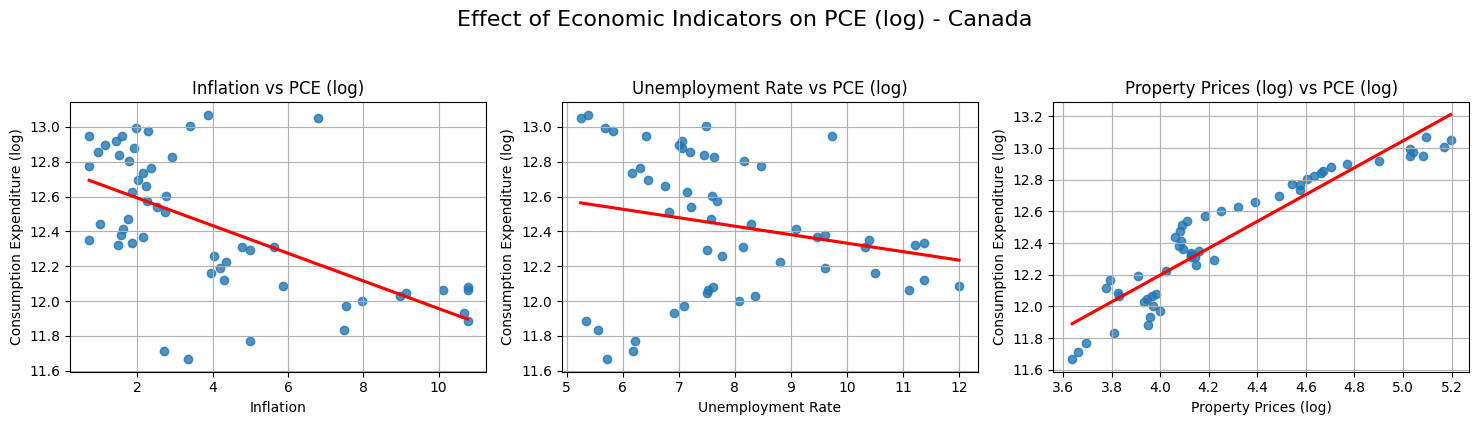

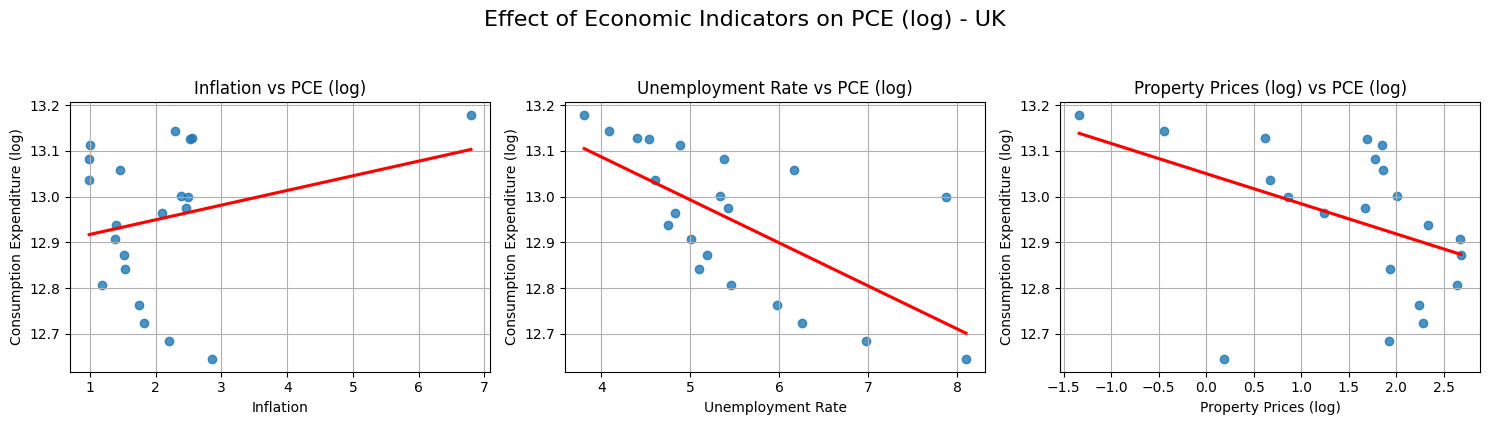

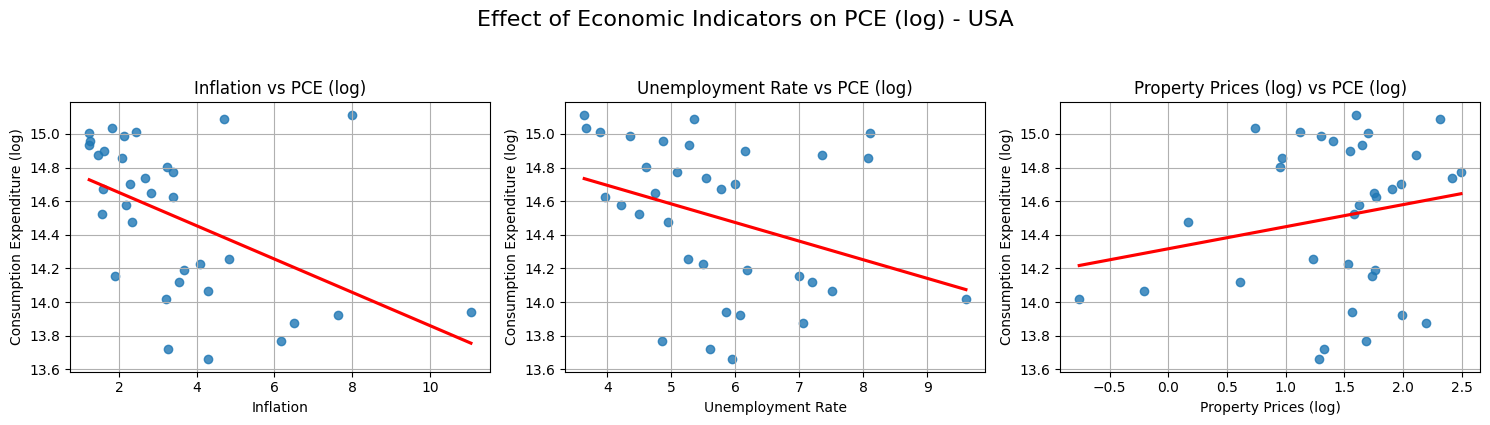

In [9]:
def regression_plots_pce(df, country_name):
    df = df[
        (df['Consumption_Expenditure'] > 0) &
        (df['Property_Prices'] > 0)
    ].copy()
    df['Log_PCE'] = np.log(df['Consumption_Expenditure'])
    df['Log_Property_Prices'] = np.log(df['Property_Prices'])


    plot_vars = [
        ('Inflation', 'Inflation'),
        ('Unemployment_Rate', 'Unemployment Rate'),
        ('Log_Property_Prices', 'Property Prices (log)')
    ]

    plt.figure(figsize=(15, 4))

    for i, (var, label) in enumerate(plot_vars):
        plt.subplot(1, 3, i + 1)
        sns.regplot(
            data=df,
            x=var,
            y='Log_PCE',
            ci=None,
            line_kws={"color": "red"}
        )
        plt.title(f'{label} vs PCE (log)')
        plt.xlabel(label)
        plt.ylabel('Consumption Expenditure (log)')
        plt.grid(True)

    plt.suptitle(f'Effect of Economic Indicators on PCE (log) - {country_name}', fontsize=16, y=1.05)
    plt.tight_layout()
    plt.show()

# Tüm ülkeler için uygula
for country, df in merged_datasets.items():
    regression_plots_pce(df, country)


In [10]:
def hypothesis_testing_pce(df, country_name):
    df = df[
        (df['Consumption_Expenditure'] > 0) &
        (df['Property_Prices'] > 0)
    ].copy()

    df['Log_PCE'] = np.log(df['Consumption_Expenditure'])
    df['Log_Property_Prices'] = np.log(df['Property_Prices'])

    X = df[['Inflation', 'Unemployment_Rate', 'Log_Property_Prices']]
    y = df['Log_PCE']
    X = sm.add_constant(X)

    
    model = sm.OLS(y, X, missing='drop').fit()

    results = []
    for var in ['Inflation', 'Unemployment_Rate', 'Log_Property_Prices']:
        coef = model.params[var]
        pval = model.pvalues[var]
        decision = 'Reject H₀' if pval < 0.05 else 'Fail to Reject H₀'

        results.append({
            'Variable': var,
            'Coefficient': round(coef, 4),
            'p-value': round(pval, 4),
            'Hypothesis Decision': decision
        })

    summary_df = pd.DataFrame(results)
    print(f"\nHypothesis Testing Results for PCE (log) - {country_name}")
    print(summary_df)

for country, df in merged_datasets.items():
    hypothesis_testing_pce(df, country)



Hypothesis Testing Results for PCE (log) - Canada
              Variable  Coefficient  p-value Hypothesis Decision
0            Inflation      -0.0294   0.0000           Reject H₀
1    Unemployment_Rate       0.0181   0.0606   Fail to Reject H₀
2  Log_Property_Prices       0.7830   0.0000           Reject H₀

Hypothesis Testing Results for PCE (log) - UK
              Variable  Coefficient  p-value Hypothesis Decision
0            Inflation      -0.0226   0.4663   Fail to Reject H₀
1    Unemployment_Rate      -0.0866   0.0016           Reject H₀
2  Log_Property_Prices      -0.0696   0.0655   Fail to Reject H₀

Hypothesis Testing Results for PCE (log) - USA
              Variable  Coefficient  p-value Hypothesis Decision
0            Inflation      -0.1046   0.0012           Reject H₀
1    Unemployment_Rate      -0.1031   0.0410           Reject H₀
2  Log_Property_Prices       0.1010   0.3007   Fail to Reject H₀



🔹 Multiple Regression (log-log, NaNs dropped): Canada
R² (log, test): 0.963
MSE (log, test): 0.007


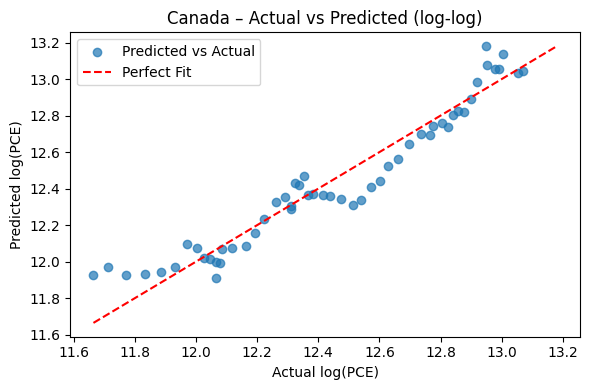


🔹 Multiple Regression (log-log, NaNs dropped): UK
R² (log, test): 0.085
MSE (log, test): 0.040


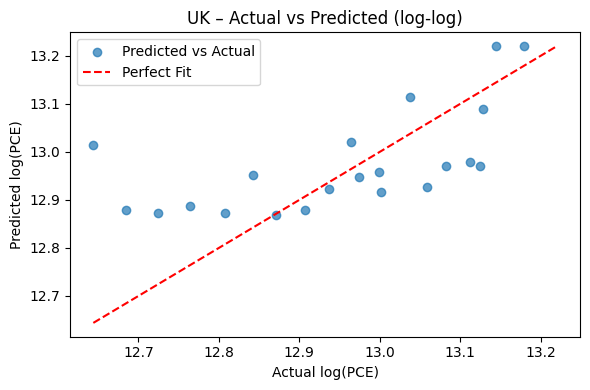


🔹 Multiple Regression (log-log, NaNs dropped): USA
R² (log, test): 0.466
MSE (log, test): 0.039


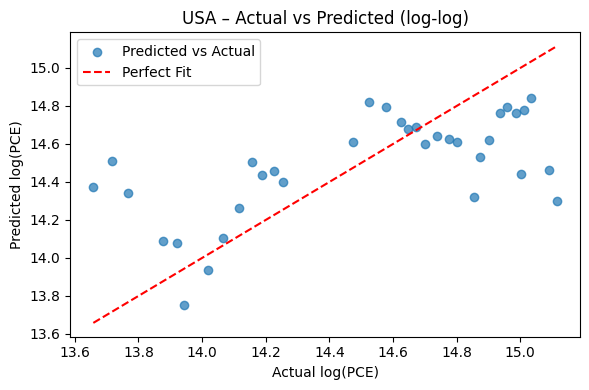

In [ ]:
model_results_split_fullplot = {}

for country, df_orig in merged_datasets.items():
    print(f"\n🔹 Multiple Regression (log-log, NaNs dropped): {country}")

    # df'in bir kopyasını al
    df = df_orig.copy()

    # Log dönüşümlerini yalnızca pozitif değerlere uygula
    df = df[(df['Property_Prices'] > 0) & (df['Consumption_Expenditure'] > 0)]

    df['Log_Property_Prices'] = np.log(df['Property_Prices'])
    df['Log_PCE']            = np.log(df['Consumption_Expenditure'])

    # NaN’e sebep olan satırları at
    df = df.dropna(subset=['Inflation', 'Unemployment_Rate', 
                           'Log_Property_Prices', 'Log_PCE'])

    # X ve y’yi yeniden tanımla
    X = df[['Inflation', 'Unemployment_Rate', 'Log_Property_Prices']]
    y = df['Log_PCE']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)

    # Modeli eğit
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Test metrikleri
    y_test_pred = model.predict(X_test)
    r2  = r2_score(y_test, y_test_pred)
    mse = mean_squared_error(y_test, y_test_pred)
    print(f"R² (log, test): {r2:.3f}")
    print(f"MSE (log, test): {mse:.3f}")

    model_results_split_fullplot[country] = {
        'model': model,
        'r2_score_test_log': r2,
        'mse_test_log': mse
    }

    # Tüm veri ile tahmin ve grafik
    y_full_pred = model.predict(X)
    min_val = min(y.min(), y_full_pred.min())
    max_val = max(y.max(), y_full_pred.max())

    plt.figure(figsize=(6, 4))
    plt.scatter(y, y_full_pred, alpha=0.7, label='Predicted vs Actual')
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Fit')
    plt.xlabel("Actual log(PCE)")
    plt.ylabel("Predicted log(PCE)")
    plt.title(f"{country} – Actual vs Predicted (log-log)")
    plt.legend()
    plt.tight_layout()
    plt.show()



📊 ML Models with 5-Fold CV: Canada
KNN – CV R²: 0.896, CV MSE: 0.016


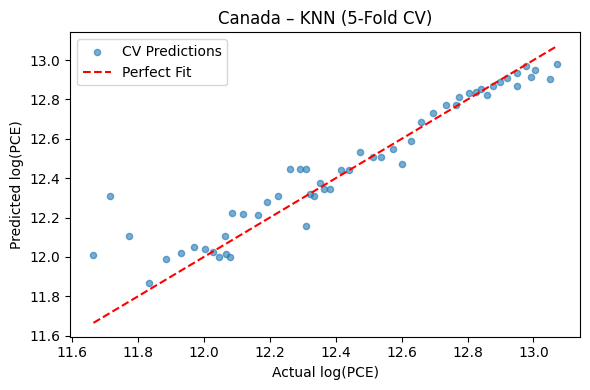

Decision Tree – CV R²: 0.933, CV MSE: 0.010


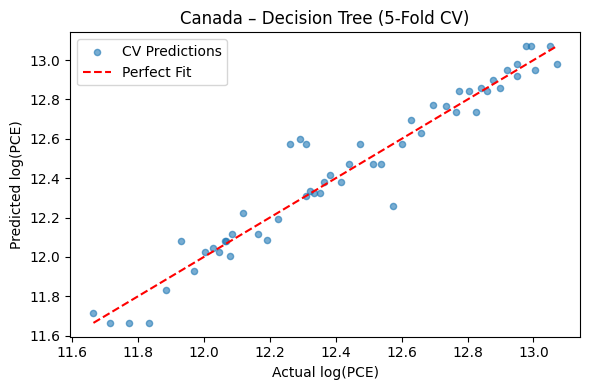

Random Forest – CV R²: 0.962, CV MSE: 0.006


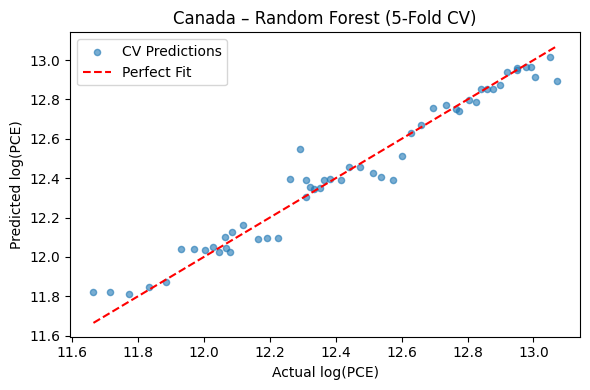

XGBoost – CV R²: 0.951, CV MSE: 0.007


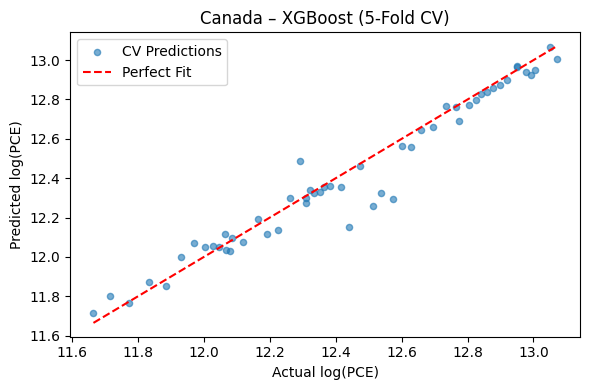


📊 ML Models with 5-Fold CV: UK
KNN – CV R²: 0.217, CV MSE: 0.019


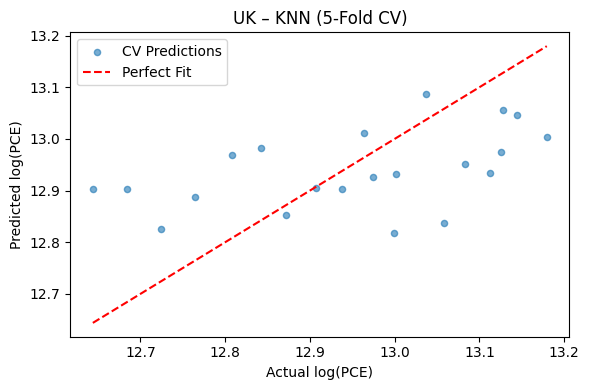

Decision Tree – CV R²: -0.207, CV MSE: 0.029


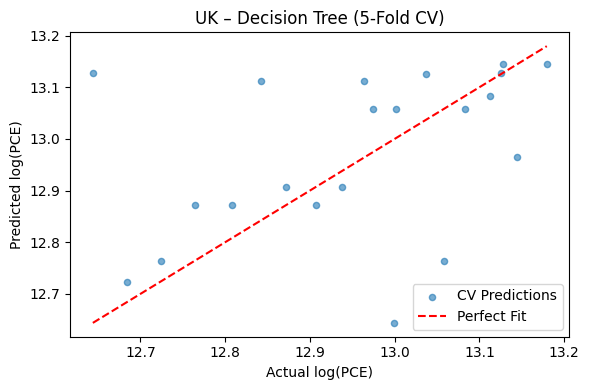

Random Forest – CV R²: 0.205, CV MSE: 0.019


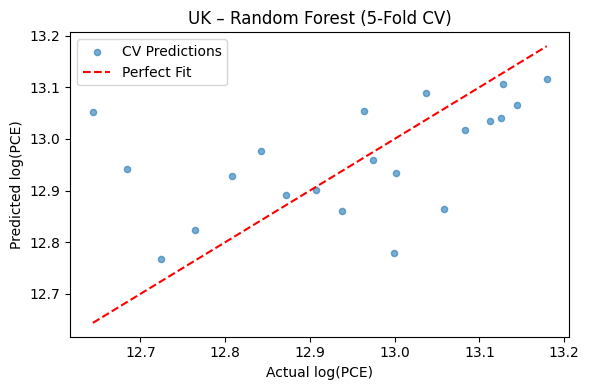

XGBoost – CV R²: -0.279, CV MSE: 0.031


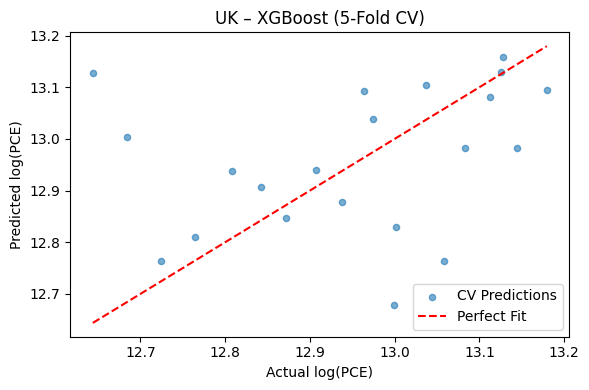


📊 ML Models with 5-Fold CV: USA
KNN – CV R²: 0.229, CV MSE: 0.153


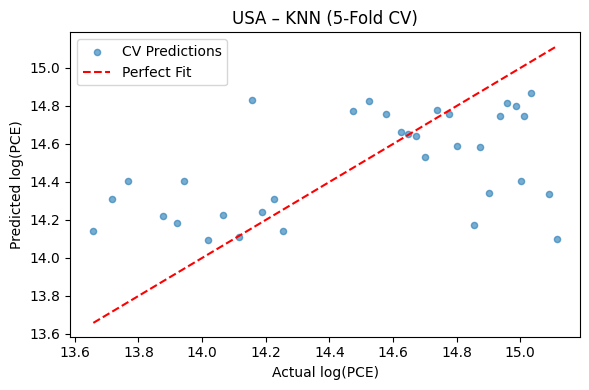

Decision Tree – CV R²: -0.374, CV MSE: 0.272


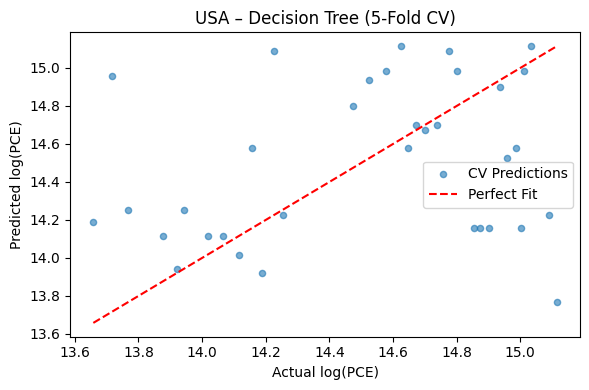

Random Forest – CV R²: 0.110, CV MSE: 0.176


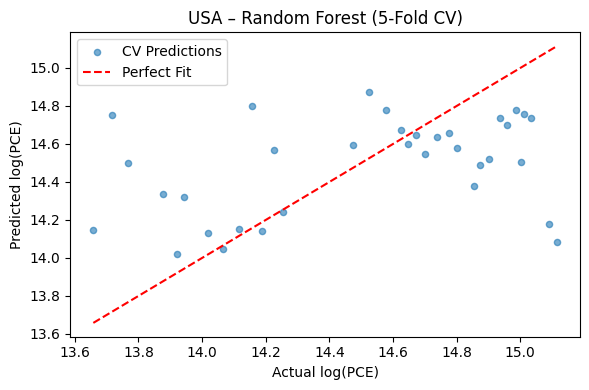

XGBoost – CV R²: -0.161, CV MSE: 0.230


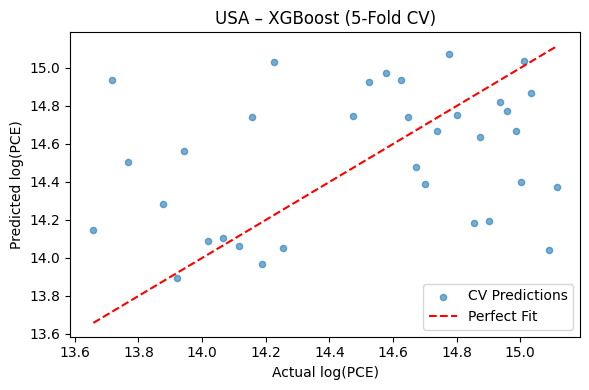

In [ ]:
# K-Fold ayarları
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for country, df_orig in merged_datasets.items():
    print(f"\n📊 ML Models with 5-Fold CV: {country}")

    # --- Veri hazırlık (log dönüşümleri + NaN atma) ---
    df = df_orig.copy()
    df = df[(df['Property_Prices'] > 0) & (df['Consumption_Expenditure'] > 0)]
    df['Log_Property_Prices'] = np.log(df['Property_Prices'])
    df['Log_PCE']             = np.log(df['Consumption_Expenditure'])
    df = df.dropna(subset=['Inflation','Unemployment_Rate','Log_Property_Prices','Log_PCE'])

    X = df[['Inflation', 'Unemployment_Rate', 'Log_Property_Prices']]
    y = df['Log_PCE']

    # Modelleri tanımla (XGBoost eklendi)
    models = {
        "KNN": make_pipeline(
            StandardScaler(), 
            KNeighborsRegressor(n_neighbors=5)
        ),
        "Decision Tree": DecisionTreeRegressor(random_state=42),
        "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
        "XGBoost": XGBRegressor(
            n_estimators=100,
            learning_rate=0.1,
            random_state=42,
            verbosity=0
        )
    }

    # Her model için CV tahminini al, metrikleri hesapla ve scatter çiz
    for name, model in models.items():
        y_pred_cv = cross_val_predict(model, X, y, cv=kf)

        # R² ve MSE (tüm veri üzerinden, CV tahminleriyle)
        r2  = r2_score(y, y_pred_cv)
        mse = mean_squared_error(y, y_pred_cv)
        print(f"{name} – CV R²: {r2:.3f}, CV MSE: {mse:.3f}")

        # Scatter (nokta sayısı = tüm veri)
        plt.figure(figsize=(6,4))
        plt.scatter(y, y_pred_cv, alpha=0.6, s=20, label='CV Predictions')
        mn, mx = y.min(), y.max()
        plt.plot([mn, mx], [mn, mx], 'r--', label='Perfect Fit')
        plt.xlabel("Actual log(PCE)")
        plt.ylabel("Predicted log(PCE)")
        plt.title(f"{country} – {name} (5-Fold CV)")
        plt.legend()
        plt.tight_layout()
        plt.show()


In [25]:

# 1) 5-fold CV setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 2) Collect results
results = []

for country, df_original in merged_datasets.items():
    # --- Data prep: keep only positive values for log transform ---
    df = df_original.copy()
    df = df[(df['Property_Prices'] > 0) & (df['Consumption_Expenditure'] > 0)]
    df['Log_Property_Prices'] = np.log(df['Property_Prices'])
    df['Log_PCE']             = np.log(df['Consumption_Expenditure'])
    df = df.dropna(subset=[
        'Inflation',
        'Unemployment_Rate',
        'Log_Property_Prices',
        'Log_PCE'
    ])

    X = df[['Inflation', 'Unemployment_Rate', 'Log_Property_Prices']]
    y = df['Log_PCE']

    # 3) Define models, including XGBoost
    models = {
        "KNN": make_pipeline(
            StandardScaler(),
            KNeighborsRegressor(n_neighbors=5)
        ),
        "Decision Tree": DecisionTreeRegressor(random_state=42),
        "Random Forest": RandomForestRegressor(
            n_estimators=100,
            random_state=42
        ),
        "XGBoost": XGBRegressor(
            n_estimators=100,
            learning_rate=0.1,
            random_state=42,
            verbosity=0
        )
    }

    # 4) Cross-val predict, compute metrics
    for name, model in models.items():
        y_pred_cv = cross_val_predict(model, X, y, cv=kf)
        mse  = mean_squared_error(y, y_pred_cv)
        mae  = mean_absolute_error(y, y_pred_cv)
        rmse = np.sqrt(mse)
        r2   = r2_score(y, y_pred_cv)
 
        results.append({
            'Country':    country,
            'Model':      name,
            'CV_R2':      r2,
            'CV_MSE':     mse,
            'CV_MAE':     mae,
            'CV_RMSE':    rmse
        })

# 5) Build DataFrame and pivot
results_df = pd.DataFrame(results)
pivot_df = (
    results_df
    .pivot(index='Country', columns='Model', 
           values=['CV_R2','CV_MSE','CV_MAE','CV_RMSE'])
)
# Flatten MultiIndex columns
pivot_df.columns = [
    f"{model}_{metric}"
    for metric, model in pivot_df.columns
]
pivot_df = pivot_df.reset_index()

# 6) Display
print("\n--- Model Comparison (5-Fold CV with MAE & RMSE + XGBoost) ---\n")
print(pivot_df.to_string(index=False, float_format="%.3f"))

# Optional: save to CSV
pivot_df.to_csv("model_comparison_with_xgb.csv",
                index=False,
                float_format="%.3f")
print("\n▶ Results saved to model_comparison_with_xgb.csv")



--- Model Comparison (5-Fold CV with MAE & RMSE + XGBoost) ---

Country  Decision Tree_CV_R2  KNN_CV_R2  Random Forest_CV_R2  XGBoost_CV_R2  Decision Tree_CV_MSE  KNN_CV_MSE  Random Forest_CV_MSE  XGBoost_CV_MSE  Decision Tree_CV_MAE  KNN_CV_MAE  Random Forest_CV_MAE  XGBoost_CV_MAE  Decision Tree_CV_RMSE  KNN_CV_RMSE  Random Forest_CV_RMSE  XGBoost_CV_RMSE
 Canada                0.933      0.896                0.962          0.951                 0.010       0.016                 0.006           0.007                 0.068       0.076                 0.052           0.056                  0.101        0.126                  0.075            0.086
     UK               -0.207      0.217                0.205         -0.279                 0.029       0.019                 0.019           0.031                 0.115       0.118                 0.103           0.127                  0.171        0.138                  0.139            0.176
    USA               -0.374      0.229        